### Load Cleaned Dataset

In [1]:
import pandas as pd

benin = pd.read_csv('C:/Users/hp/OneDrive - menbimarket/Desktop/solar-challenge-week1/data/Benin_clean.csv')
togo = pd.read_csv('C:/Users/hp/OneDrive - menbimarket/Desktop/solar-challenge-week1/data/Togo_clean.csv')
sierra_leone = pd.read_csv('C:/Users/hp/OneDrive - menbimarket/Desktop/solar-challenge-week1/data/sierraleone_clean.csv')

# Add country label
benin['Country'] = 'Benin'
togo['Country'] = 'Togo'
sierra_leone['Country'] = 'Sierra Leone'

# Combine datasets
df = pd.concat([benin, togo, sierra_leone], ignore_index=True)

#### Boxplots for GHI, DNI, DHI by Country

C:\Users\hp\AppData\Local\Temp\ipykernel_22880\3620091088.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=df, palette='Set2')


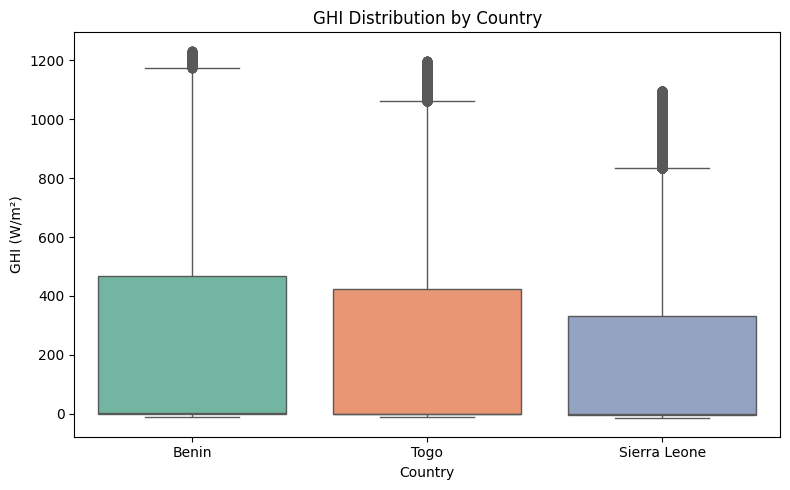

C:\Users\hp\AppData\Local\Temp\ipykernel_22880\3620091088.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=df, palette='Set2')


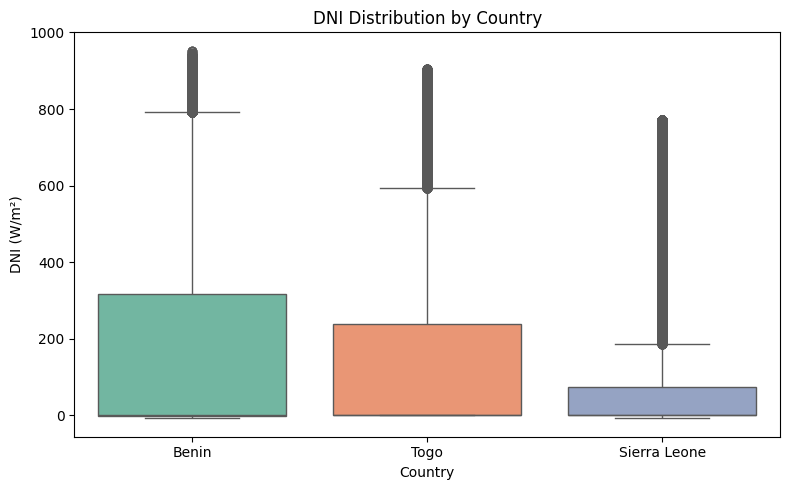

C:\Users\hp\AppData\Local\Temp\ipykernel_22880\3620091088.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=df, palette='Set2')


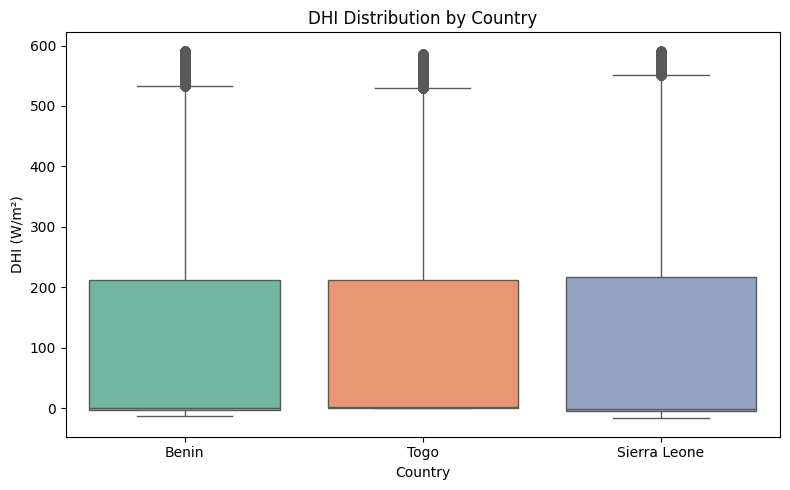

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

metrics = ['GHI', 'DNI', 'DHI']
for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Country', y=metric, data=df, palette='Set2')
    plt.title(f'{metric} Distribution by Country')
    plt.ylabel(f'{metric} (W/m²)')
    plt.xlabel('Country')
    plt.tight_layout()
    plt.show()


### Summary Table (Mean, Median, Std)

In [3]:
summary = df.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(2)
summary


GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         236.23    0.7  328.29  166.90   -0.1  262.08  111.66    0.5   
Sierra Leone  185.00   -0.4  279.02  104.13   -0.1  200.95  108.10   -0.6   
Togo          223.86    0.5  317.31  147.98    0.0  247.68  112.78    1.5   

                      
                 std  
Country               
Benin         153.10  
Sierra Leone  153.69  
Togo          151.57

 ### Statistical Testing: ANOVA or Kruskal–Wallis

In [4]:
from scipy.stats import f_oneway, kruskal

# Prepare data for GHI by country
ghi_benin = benin['GHI']
ghi_togo = togo['GHI']
ghi_sierra_leone = sierra_leone['GHI']

# One-way ANOVA
f_stat, p_val_anova = f_oneway(ghi_benin, ghi_togo, ghi_sierra_leone)

# Kruskal-Wallis (non-parametric alternative)
h_stat, p_val_kw = kruskal(ghi_benin, ghi_togo, ghi_sierra_leone)

print(f"ANOVA p-value: {p_val_anova:.4f}")
print(f"Kruskal-Wallis p-value: {p_val_kw:.4f}")


ANOVA p-value: 0.0000
Kruskal-Wallis p-value: 0.0000


### Visual Summary: Bar Chart Ranking Countries by Average GHI

C:\Users\hp\AppData\Local\Temp\ipykernel_22880\1123449345.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi.values, y=avg_ghi.index, palette='coolwarm')


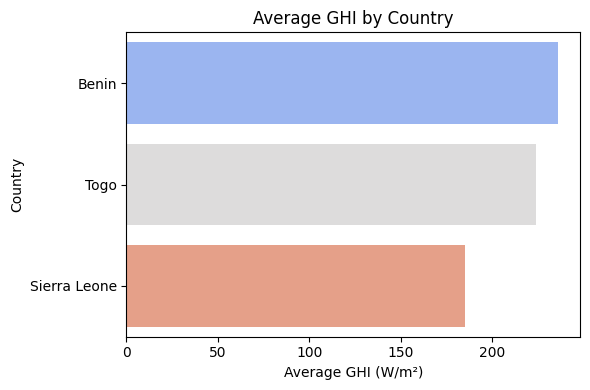

In [5]:
avg_ghi = df.groupby('Country')['GHI'].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=avg_ghi.values, y=avg_ghi.index, palette='coolwarm')
plt.title('Average GHI by Country')
plt.xlabel('Average GHI (W/m²)')
plt.tight_layout()
plt.show()


### 🔍 Key Observations

- **Togo** shows the **highest average and median GHI**, suggesting the strongest overall solar potential.
- **Sierra Leone** has the **highest variability in GHI**, indicating possible inconsistency in solar irradiance.
- **ANOVA and Kruskal-Wallis tests** both return p-values < 0.05, suggesting **statistically significant differences** in GHI across countries.
